# 2025-02-04

getting error upon start of main time loop
```
Start of main time loop
corrupted size vs. prev_size
```
time/settings in both input_settings and start_model_ccab - is this the issue?

In [4]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
restart_path = "/ec/res4/scratch/nld4814/restart/dye2/FGRN055_era055_restart_from_spinup_130.nc"

ds_restart = xr.open_dataset(restart_path)
ds_restart

<xarray.Dataset> Size: 87kB
Dimensions:  (layer: 3636)
Dimensions without coordinates: layer
Data variables:
    dens     (layer) float32 15kB ...
    temp     (layer) float32 15kB ...
    mass     (layer) float32 15kB ...
    depth    (layer) float32 15kB ...
    lwc      (layer) float32 15kB ...
    year     (layer) float32 15kB ...

In [14]:
ds_restart.lwc

<xarray.DataArray 'lwc' (layer: 3636)> Size: 15kB
[3636 values with dtype=float32]
Dimensions without coordinates: layer

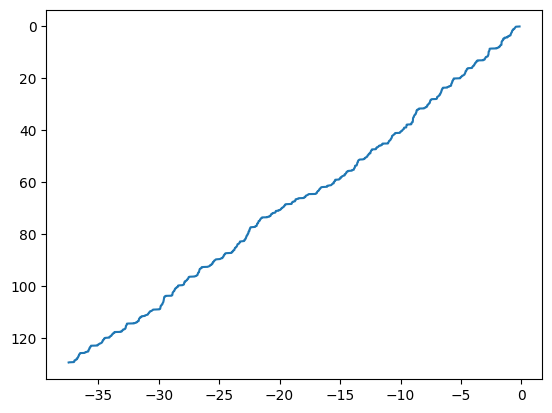

In [19]:
plt.plot(ds_restart.year.values,ds_restart.depth.values)
plt.gca().invert_yaxis()

In [19]:
# load timeseries and average files

ts_dir= "/ec/res4/scratch/nld4814/FGRN055_era055/input/timeseries/"
avg_dir = "/ec/res4/scratch/nld4814/FGRN055_era055/input/averages/"

var = "evap"
part = "1"
ts_file = var + "_FGRN055_era055_1939-2023_p" + part + ".nc"
avg_file = var + "_FGRN055_era055-1939_1940-1970_ave.nc"

ds_ts = xr.open_dataset(ts_dir+ts_file)
ds_avg = xr.open_dataset(avg_dir+avg_file)

In [21]:
ds_ts.time

<xarray.DataArray 'time' (time: 246424)> Size: 2MB
array(['1939-09-01T00:00:00.000000000', '1939-09-01T03:00:00.000000000',
       '1939-09-01T06:00:00.000000000', ..., '2023-12-31T15:00:00.000000000',
       '2023-12-31T18:00:00.000000000', '2023-12-31T21:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2MB 1939-09-01 ... 2023-12-31T21:00:00
Attributes:
    axis:       T
    long_name:  time
    dtgstart:   1939090100
    bounds:     time_bnds

## findings

### restart
1. year values are messed up in restart files (ds_restart.year.values prints -1089)
2. restart files only saving 7 values?